In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("iris_1.csv")
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

knn=KNeighborsClassifier(n_neighbors=5)
X=df.drop(['Species','Id'],axis=1)
Y=LabelEncoder().fit_transform(df['Species'])

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
knn.score(X_test,Y_test)

1.0

In [31]:
from sklearn.metrics import confusion_matrix
pred=knn.predict(X_test)
confusion_matrix(Y_test,pred,labels=[0,1,2])

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [33]:
#Kfold Cross validation
from sklearn.cross_validation import cross_val_score
score=cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
score.mean()

0.96666666666666679

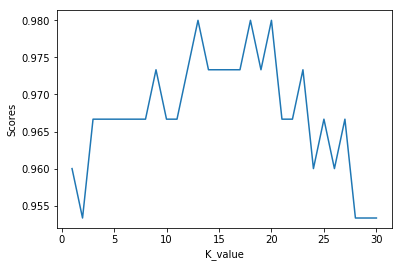

In [35]:
l=range(1,31)
score_k=[]
for i in l:
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
    score_k.append(score.mean())
score_k
plt.plot(l,score_k)
plt.xlabel('K_value')
plt.ylabel('Scores')